In [76]:
import pandas as pd
import numpy as np
import re
import shlex


In [77]:
df = pd.read_excel('transport.xlsx', sheet_name = 1)
df.head()

,Название компаний,Год,Месяц,Страна отправления,Тип вагона,Страна прибытия,Вагонов,Выручка
0,Компания 1,2019,1,АЗЕРБАЙДЖАН,Крытые,БЕЛАРУСЬ,8200,123000
1,Компания 1,2019,1,АЗЕРБАЙДЖАН,Крытые,РОССИЯ,200,3000
2,Компания 1,2019,1,АЗЕРБАЙДЖАН,Полувагоны,РОССИЯ,400,6000
3,Компания 1,2019,1,БЕЛАРУСЬ,Крытые,РОССИЯ,3800,57000
4,Компания 1,2019,1,БЕЛАРУСЬ,Полувагоны,РОССИЯ,300,4500


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Название компаний   9680 non-null   object
 1   Год                 9680 non-null   object
 2   Месяц               9680 non-null   object
 3   Страна отправления  9680 non-null   object
 4   Тип вагона          9680 non-null   object
 5   Страна прибытия     9680 non-null   object
 6   Вагонов             9610 non-null   object
 7   Выручка             9665 non-null   object
dtypes: object(8)
memory usage: 605.1+ KB


Выше приведено описание получившегося датасета из файла. Видим, что тип всех столбцов - object. В то же время, в данных для столбцов "Год", "Месяц" мы ожидаем увидеть данные формата "дата", столбцы "Вагонов", "Выручка" должны содержать численные данные (количество), а в столбцах "Название компаний", "Страна отправления", "Тип вагона" и "Страна прибытия" содержатся текстовые данные, которые вполне могут быть представлены объектным типом. Но здесь нужно помнить, что объектный тип данных Pandas может содержать разные базовые типы, например, символьные данные и числовые. В данном случае, Такое уместно разве что для столбца "Название компаний".

### Задание 1

In [79]:
#Проверяем, есть ли отсутствующие значения в столбцах

def valnull(data):
    qnum=0
    for i in range(len(data.columns)):
        for j in range(len(data)):
            if pd.isnull(data.iloc[j, i]):
                #print('yes   ', data.iloc[j, :])
                qnum+=1
        print(f'Количество строк с пропущенными значениями для столбца с индексом {i}: {qnum}')
        qnum=0

valnull(df)

Количество строк с пропущенными значениями для столбца с индексом 0: 0
Количество строк с пропущенными значениями для столбца с индексом 1: 0
Количество строк с пропущенными значениями для столбца с индексом 2: 0
Количество строк с пропущенными значениями для столбца с индексом 3: 0
Количество строк с пропущенными значениями для столбца с индексом 4: 0
Количество строк с пропущенными значениями для столбца с индексом 5: 0
Количество строк с пропущенными значениями для столбца с индексом 6: 70
Количество строк с пропущенными значениями для столбца с индексом 7: 15


In [80]:
df = df.fillna(0)

Видим, что ошибка 1 ("Пропущенные значения") есть только в двух последних столбцах, содержащих числовые данные.

Обратим внимание на то, что столбцы "Название компаний", "Страна отправления", "Тип вагона", "Страна прибытия" содержат факторные переменные. Проверим, есть ли среди них не символьные значения.

In [81]:
l = [0, 3, 4, 5]
for j in range(len(df)):
    for i in l:
        val = df.iloc[j, i]
        if type(val) != str:
            print('yes: ', df.iloc[j, i], ',  столбец: ', df.columns[i], ',  строка: ', j)
        else:
            continue

yes:  7777777 ,  столбец:  Страна прибытия ,  строка:  420
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  617
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  618
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  891
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  976
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1045
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1158
yes:  7777777 ,  столбец:  Страна прибытия ,  строка:  1169
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1487
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1608
yes:  7777777 ,  столбец:  Страна прибытия ,  строка:  1612
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1696
yes:  7777777 ,  столбец:  Страна прибытия ,  строка:  1696
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  1984
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  2064
yes:  7777777 ,  столбец:  Страна отправления ,  строка:  2147
yes:  777

Видим, что столбцы "Название компаний", "Страна отправления" и "Страна прибытия" содержат некорректные данные - либо ошибка при вводе, либо случайная замена названия компании или страны.

In [82]:
l = [0, 3, 4, 5]
for j in range(len(df)):
    for i in l:
        val = df.iloc[j, i]
        if type(val) != str:
            df.iloc[j, i] = np.nan

Также мы видим, что страны в первых строках у нас указаны в верхнем регистре, для анализа данных важна однотипность указываемых факторных значений, поэтому проверим эти колонки на наличие стран в нижнем регистре.

In [83]:
l = [3, 5]
col = 0
for i in l:
    for j in range(len(df)):
        val = df.iloc[j, i]
        if type(val) == str:
            if val.isupper():
                col+=1
            else:
                continue
    print(f'Количество значений в верхнем регистре: {col}')
    print(f'Всего количество значений: {len(df)}')
    print(f'Разница по столбцу <{df.columns[i]}>: {len(df)-col}')
    col=0

Количество значений в верхнем регистре: 9144
Всего количество значений: 9680
Разница по столбцу <Страна отправления>: 536
Количество значений в верхнем регистре: 9424
Всего количество значений: 9680
Разница по столбцу <Страна прибытия>: 256


Выше видим, что в верхнем регистре значений меньше, чем всего значений в столбцах. Это значит, что в столбце <Страна отправления> 536 значений отклоняются от нормы (скорее всего, написаны с заглавной буквы), а в столбце <Страна прибытия> - 256 таких "отклоняющихся" значений.

In [84]:
l = [3, 5]
for i in l:
    for j in range(len(df)):
        val = df.iloc[j, i]
        if type(val) == str:
            if not val.isupper():
                df.iloc[j, i] = val.upper()
                #print('1')
            else:
                continue

Посмотрим теперь на значения столбца "Год" и "Месяц":

In [85]:
df['Год'].value_counts()

2019     6314
2020     3016
2О19      320
2 019      20
2O19       10
Name: Год, dtype: int64

Видим наличие одних и тех же 2019 и 2020 годов, но в 5 вариациях. 1 ошибка сразу же видна - пробел при написании 2019 года. Посмотрим, чем еще различаются остальные варианты.

In [86]:
for i in range(len(df)):
    if df.iloc[i, 1] == '2 019':
        df.iloc[i, 1] = 2019
        #print('2')

In [87]:
col=0
for j in range(len(df)):
        val = df.iloc[j, 1]
        if type(val) != int:
            col+=1
            #print(shlex.split(df.iloc[j, 1]))
            #x = re.sub("'","", val)
            #x = list(val) 
            #x.remove("'")
            #x =''.join(x) 
            #df.iloc[j, 1]=df.iloc[j, 1].replace('\'', '') 
            df.drop(np.where(df['Год'] == val)[0])
            print(shlex.split(df.iloc[j, 1]))
        else:
            continue
col

['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
[

330

330 значений столбца "Год" не являются числовыми, сдуя по всему, поэтому вариантов больше 2-х.

In [88]:
#df['Год'] = df['Год'].str.replace("'", "")
#print(shlex(df['Год']))

In [89]:
def single_quote(s):
    """Escape a string with single quotes in order to be parsed as a single element by shlex

    Parameters
    ----------
    s : str
        The string to quote

    Returns
    -------
    str
       The quoted string
    """
    if not s:
        return "''"
    if find_unsafe(s) is None:
        return s

    # use single quotes, and put single quotes into double quotes
    # the string $'b is then quoted as '$'"'"'b'
    return "'" + s.replace("'", "'\"'\"'") + "'" 

In [90]:
#col=0
for j in range(len(df)):
        val = df.iloc[j, 1]
        if type(val) != int:
            #df.iloc[j, 1] = single_quote(val)
            print(shlex.split(df.iloc[j, 1]))
            #col+=1
            #print('!',val, '!')
        else:
            continue
#col

['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
['2О19']
[

In [91]:
def testQuote(self):
        safeunquoted = string.ascii_letters + string.digits + '@%_-+=:,./'
        unicode_sample = '\xe9\xe0\xdf'  # e + acute accent, a + grave, sharp s
        unsafe = '"`$\\!' + unicode_sample

        self.assertEqual(shlex.quote(''), "''")
        self.assertEqual(shlex.quote(safeunquoted), safeunquoted)
        self.assertEqual(shlex.quote('test file name'), "'test file name'")
        for u in unsafe:
            self.assertEqual(shlex.quote('test%sname' % u),
                             "'test%sname'" % u)
        for u in unsafe:
            self.assertEqual(shlex.quote("test%s'name'" % u),
                             "'test%s'\"'\"'name'\"'\"''" % u)

testQuote()

TypeError: testQuote() missing 1 required positional argument: 'self'

Так как при обработке подобных значений не удалось избавиться от одинарных кавычек (всеми возможными способами, видимо глюк какой-то) в этих значениях "'2019'", то принято решение удалить эти строки.


In [92]:
df.drop(np.where(df['Год'] == "'2019'")[0])


,Название компаний,Год,Месяц,Страна отправления,Тип вагона,Страна прибытия,Вагонов,Выручка
0,Компания 1,2019,1,АЗЕРБАЙДЖАН,Крытые,БЕЛАРУСЬ,8200,123000
1,Компания 1,2019,1,АЗЕРБАЙДЖАН,Крытые,РОССИЯ,200,3000
2,Компания 1,2019,1,АЗЕРБАЙДЖАН,Полувагоны,РОССИЯ,400,6000
3,Компания 1,2019,1,БЕЛАРУСЬ,Крытые,РОССИЯ,3800,57000
4,Компания 1,2019,1,БЕЛАРУСЬ,Полувагоны,РОССИЯ,300,4500
...,...,...,...,...,...,...,...,...
9675,Компания 16,2020,3,ТУРЦИЯ,Полувагоны,РОССИЯ,87,1305
9676,Компания 16,2020,3,УЗБЕКИСТАН,Полувагоны,КАЗАХСТАН,174,2610
9677,Компания 16,2020,3,УЗБЕКИСТАН,Полувагоны,РОССИЯ,783,11745
9678,Компания 16,2020,3,УКРАИНА,Полувагоны,КАЗАХСТАН,1479,22185


In [93]:
df['Год']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
9675    2020
9676    2020
9677    2020
9678    2020
9679    2020
Name: Год, Length: 9680, dtype: object

In [94]:
ar = dict(df['Месяц'].value_counts())

In [95]:
ar

{2: 1338,
 3: 1269,
 6: 1052,
 5: 922,
 4: 912,
 1: 864,
 9: 607,
 8: 552,
 11: 539,
 10: 532,
 7: 515,
 12: 506,
 '07.01.1900': 12,
 '07.01.1943': 1,
 '07.01.1931': 1,
 '07.01.1938': 1,
 '07.01.1917': 1,
 '07.01.1904': 1,
 '07.01.1942': 1,
 '07.01.1906': 1,
 '07.01.1916': 1,
 '07.01.1958': 1,
 '07.01.1908': 1,
 '07.01.1922': 1,
 '07.01.1918': 1,
 '07.01.1910': 1,
 '07.01.1911': 1,
 '07.01.1941': 1,
 '07.01.1960': 1,
 '07.01.1905': 1,
 '07.01.1929': 1,
 '07.01.1957': 1,
 '07.01.1956': 1,
 '07.01.1920': 1,
 '07.01.1927': 1,
 '07.01.1937': 1,
 '07.01.1930': 1,
 '07.01.1949': 1,
 '07.01.1928': 1,
 '07.01.1945': 1,
 '07.01.1935': 1,
 '07.01.1944': 1,
 '07.01.1955': 1,
 '07.01.1921': 1,
 '07.01.1925': 1,
 '07.01.1936': 1,
 '07.01.1947': 1,
 '07.01.1933': 1,
 '07.01.1954': 1,
 '07.01.1902': 1,
 '07.01.1946': 1,
 '07.01.1907': 1,
 '07.01.1913': 1,
 '07.01.1950': 1,
 '07.01.1932': 1,
 '07.01.1915': 1,
 '07.01.1948': 1,
 '07.01.1959': 1,
 '07.01.1924': 1,
 '07.01.1951': 1,
 '07.01.1912': 1,
 '0

И в значении "месяц" мы видим перечень дат в форме "число.месяц.год", что тоже является ошибкой.

In [97]:
len(df)

9680

In [100]:
#Регулярное выражение для проверки "формат значения == дата"
#(0[1-9]|[12][0-9]|3[01])[- /.](0[1-9]|1[012])[- /.](19|20)\d\d
l_string = []
for j in range(len(df)):
    string = df.iloc[j, 2]
    if type(string) != int:
    #print(type(string))
        if re.search(r'(0[1-9]|[12][0-9]|3[01])[- /.](0[1-9]|1[012])[- /.](19|20)\d\d', string):
            if string in l_string:
                pass
            else:
            #df.drop([j], inplace = True)
                l_string.append(string)
            #df.drop(df[df["Месяц"]==string].index, inplace = True)

In [102]:
for st in l_string:
    df.drop(df[df["Месяц"]==st].index, inplace = True)

In [103]:
len(df)

9608

In [105]:
ar2 = dict(df['Месяц'].value_counts())
ar2

{2: 1338,
 3: 1269,
 6: 1052,
 5: 922,
 4: 912,
 1: 864,
 9: 607,
 8: 552,
 11: 539,
 10: 532,
 7: 515,
 12: 506}

In [173]:
df['Название компаний'].value_counts()

Компания 9     891
Компания 1     891
Компания 5     891
Компания 13    891
Компания 14    704
Компания 10    704
Компания 6     704
Компания 2     692
Компания 15    469
Компания 3     469
Компания 11    469
Компания 7     440
Компания 8     356
Компания 4     356
Компания 12    356
Компания 16    354
2222            25
Апельсин         9
Яблоки           9
Name: Название компаний, dtype: int64

Судя по общей тенденции названий компаний "Компания №...", компании 2222, "Апельсин" и "Яблоки" являются ошибками.) Как минимум, 2222 - точно ошибка, так компанию вряд ли назовут.

In [107]:
df.drop(df[df["Название компаний"]=="Апельсин"].index, inplace = True)
df.drop(df[df["Название компаний"]=="Яблоки"].index, inplace = True)
df.drop(df[df["Название компаний"]=="2222"].index, inplace = True)
df['Название компаний'].value_counts()

Компания 13    891
Компания 1     891
Компания 5     886
Компания 9     824
Компания 10    704
Компания 6     704
Компания 14    704
Компания 2     692
Компания 15    469
Компания 11    469
Компания 3     469
Компания 7     440
Компания 12    356
Компания 8     356
Компания 4     356
Компания 16    354
Name: Название компаний, dtype: int64

In [108]:
df['Тип вагона'].value_counts()

Крытые        4594
Полувагоны    2738
Цистерны      2121
Самолет         65
Полубагоны      25
Крысые          19
Полумагоны      18
Цестерны        10
Name: Тип вагона, dtype: int64

И здесь мы видим орфографические ошибки "Полубагоны", "Крысые", "Полумагоны", "Цестерны".

In [109]:
for i in range(len(df)):
    if df.iloc[i, 4] == 'Полубагоны':
        df.iloc[i, 4] = 'Полувагоны'
    elif df.iloc[i, 4] == 'Полумагоны':
        df.iloc[i, 4] = 'Полувагоны'
    elif df.iloc[i, 4] == 'Крысые':
        df.iloc[i, 4] = 'Крытые'
    elif df.iloc[i, 4] == 'Цестерны':
        df.iloc[i, 4] = 'Цистерны'
        
df['Тип вагона'].value_counts()

Крытые        4613
Полувагоны    2781
Цистерны      2131
Самолет         65
Name: Тип вагона, dtype: int64

Теперь посмотрим на значения в столбце вагонов, есть ли там опечатки:

In [112]:
col=0
mistake = []
for j in range(len(df)):
        val = df.iloc[j, 6]
        if pd.isnull(val) == False:
            if type(val) != int:
                col+=1
                print(f'Значение: {val}, строка: {j}')
                if val in mistake:
                    pass
                else: 
                    mistake.append(val)
            else:
                continue
col

0

Да, видим, что исключая отсутствующией данные, есть еще опечатки, всего 15 строк с ошибками-опечатками.

In [113]:
for m in mistake:
    df.drop(df[df["Вагонов"]==m].index, inplace = True)
    

И посмотрим, есть ли подобные опечатки в столбце "Выручка":

In [114]:
col=0
for j in range(len(df)):
        val = df.iloc[j, 7]
        if pd.isnull(val) == False:
            if type(val) != int:
                col+=1
                print(f'Значение: {val}, строка: {j}')
            else:
                continue
col

Значение: цйцу, строка: 6452


1

Да, одно значение есть.

In [115]:
df.drop(df[df["Выручка"]=="цйцу"].index, inplace = True)

### Задание 2

таблицу в разрезе месяц/год/компания/количество вагонов/выручка

In [116]:
table = df[['Месяц', 'Год', 'Название компаний', 'Вагонов', 'Выручка']]
table.head()

,Месяц,Год,Название компаний,Вагонов,Выручка
0,1,2019,Компания 1,8200,123000
1,1,2019,Компания 1,200,3000
2,1,2019,Компания 1,400,6000
3,1,2019,Компания 1,3800,57000
4,1,2019,Компания 1,300,4500


линейный график помесячной динамики количества вагонов в разрезе направления
(страна отправления-страна прибытия)

In [118]:
import matplotlib.pyplot as plt
import numpy as np

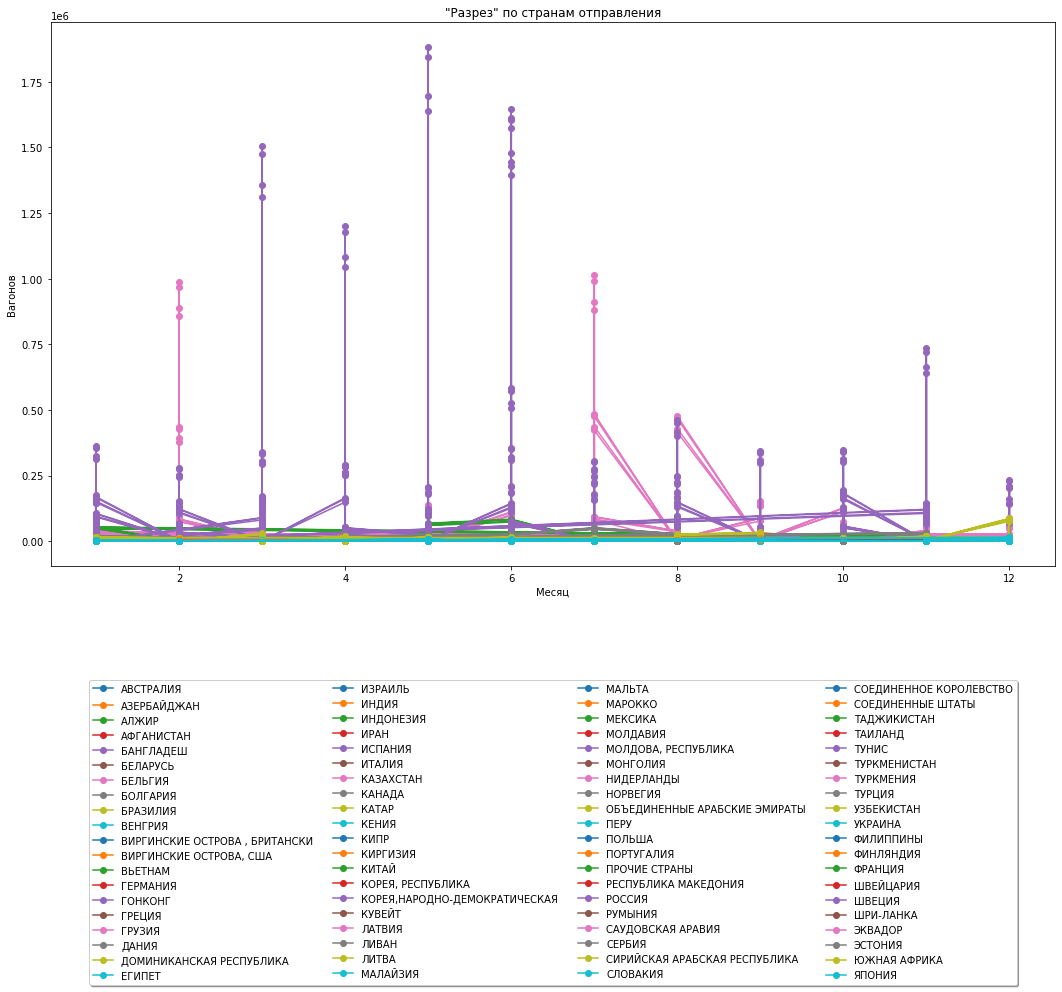

In [141]:
plt.figure(figsize = (18, 10))
for i in df.groupby('Страна отправления'):
    plt.plot(i[1]['Месяц'], i[1]["Вагонов"],'-o',label=i[0])

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel('Месяц')
plt.ylabel('Вагонов')
plt.title('"Разрез" по странам отправления')
plt.show()

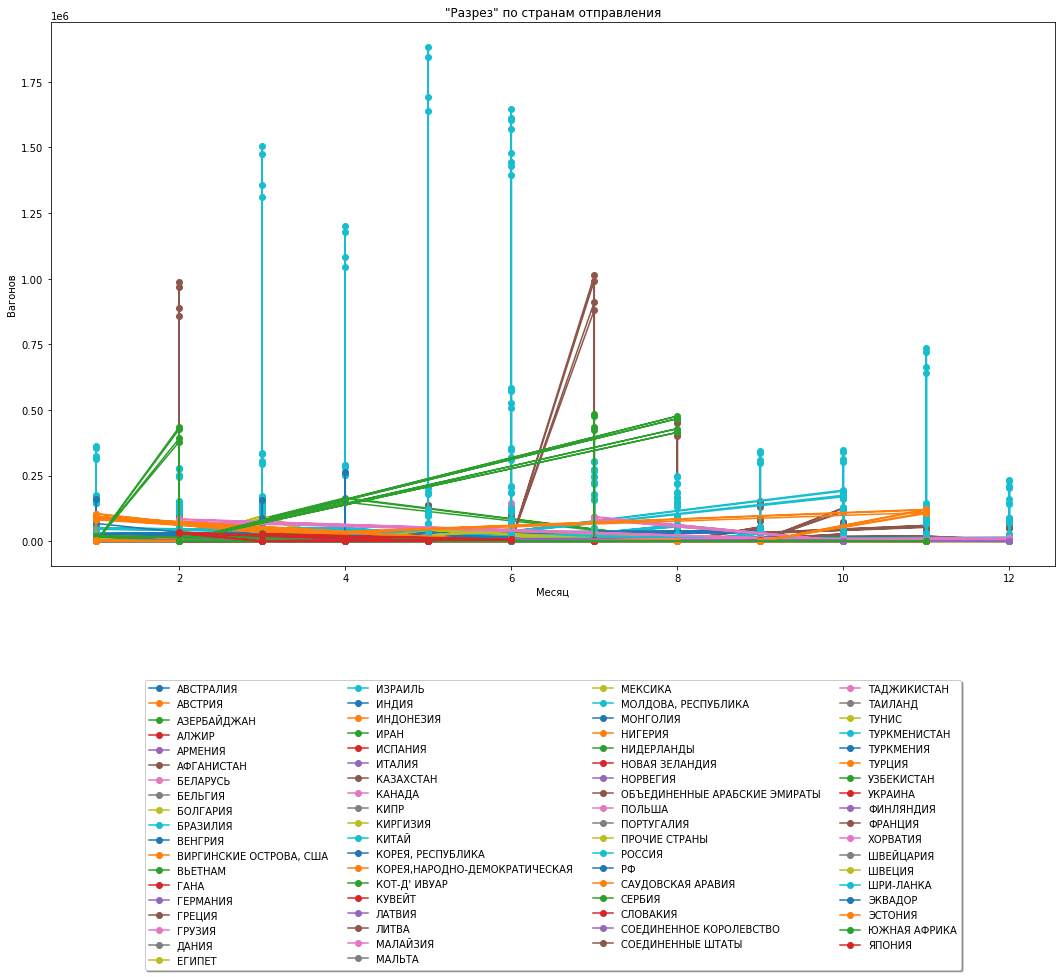

In [142]:
plt.figure(figsize = (18, 10))
for i in df.groupby('Страна прибытия'):
    plt.plot(i[1]['Месяц'], i[1]["Вагонов"],'-o',label=i[0])

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel('Месяц')
plt.ylabel('Вагонов')
plt.title('"Разрез" по странам отправления')
plt.show()

график piechart распределения долей в количестве вагонов по компаниям за последний
квартал по отправлениям из России

In [145]:
главное - вагоны vs компании + ограничение страна отправления=Россия

SyntaxError: invalid syntax (<ipython-input-145-1ea88ccb5721>, line 1)

In [ ]:
сабплоты по компаниям, сделать выборку по стране отправления + за последние 3 месяца - октябрь, ноябрь, декабрь (10, 11, 12)

In [153]:
df2=df.loc[df['Страна отправления']=='РОССИЯ']
df3 = df.loc[(df['Месяц']==10) | (df['Месяц']==11) | (df['Месяц']==12)]
df3

,Название компаний,Год,Месяц,Страна отправления,Тип вагона,Страна прибытия,Вагонов,Выручка
343,Компания 1,2019,10,АЗЕРБАЙДЖАН,Крытые,РОССИЯ,1200,18000
344,Компания 1,2019,10,АФГАНИСТАН,Крытые,КАЗАХСТАН,28600,429000
345,Компания 1,2019,10,БАНГЛАДЕШ,Крытые,РОССИЯ,100,1500
346,Компания 1,2019,10,БЕЛАРУСЬ,Крытые,РОССИЯ,900,13500
347,Компания 1,2019,10,БОЛГАРИЯ,Крытые,РОССИЯ,300,4500
...,...,...,...,...,...,...,...,...
9620,Компания 16,2O19,11,УЗБЕКИСТАН,Полувагоны,КАЗАХСТАН,17922,268830
9621,Компания 16,2O19,11,УЗБЕКИСТАН,Полувагоны,РОССИЯ,1914,28710
9622,Компания 16,2O19,11,УКРАИНА,Крытые,РОССИЯ,696,10440
9623,Компания 16,2O19,11,ЭСТОНИЯ,Крытые,РОССИЯ,87,1305


In [156]:
(df3['Название компаний'].value_counts()).count()

16

In [ ]:
делаем 16 круговых даграмм

([<matplotlib.patches.Wedge at 0x1d1725e7630>,
 [Text(1.0999994529707893, 0.0010970250519400976, ''),
  Text(1.0999942220087846, 0.0035653256918211826, ''),
  Text(1.0999797561817668, 0.006673529073976891, ''),
  Text(1.0999565076640883, 0.009781679171932466, ''),
  Text(1.0999358006667956, 0.011884208492603032, ''),
  Text(1.0998796405675733, 0.016271947177452575, ''),
  Text(1.0998093962035667, 0.0204766213606209, ''),
  Text(1.0997972977012787, 0.021116438358896292, ''),
  Text(1.0997902171541283, 0.02148204487649043, ''),
  Text(1.099781195556277, 0.02193904967873774, ''),
  Text(1.0997568506608926, 0.023127244203227575, ''),
  Text(1.099700055465177, 0.025686338973991776, ''),
  Text(1.0996373053557262, 0.028245294652344356, ''),
  Text(1.0996036973139507, 0.02952471597643957, ''),
  Text(1.0994163106441983, 0.03582981844079125, ''),
  Text(1.0980909607776679, 0.06477840580300474, ''),
  Text(1.0960423359792515, 0.0932265935296655, ''),
  Text(1.0895611487107508, 0.151183673788241

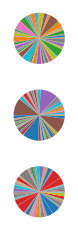

In [159]:
data1 = df3[df3['Месяц']==10]
data2 = df3[df3['Месяц']==11]
data3 = df3[df3['Месяц']==12]


fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.pie(data1['Вагонов'])
ax2.pie(data2['Вагонов'])
ax3.pie(data3['Вагонов'])
#plt.pie(df3['Вагонов'])

In [165]:

col = 0
names = []
for j in df3['Название компаний']:
    
for i in df3['Название компаний']:
    'company'+str(col) = df3[df3['Название компаний']==i]
    col+=1
    print('company'+str(col))


SyntaxError: can't assign to operator (<ipython-input-165-c22fa467038f>, line 3)

In [166]:
df3['Название компаний'].value_counts()

Компания 10    152
Компания 6     152
Компания 14    152
Компания 9     149
Компания 13    149
Компания 1     149
Компания 2     146
Компания 5     146
Компания 12     50
Компания 4      50
Компания 16     50
Компания 8      49
Компания 3      44
Компания 15     44
Компания 11     44
Компания 7      42
Name: Название компаний, dtype: int64

In [172]:
figure(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16) = plt.subplots(16, 2)
ax1.pie(df3['Вагонов'][df3['Название компаний']=='Компания 1'])
ax2.pie(df3['Вагонов'][df3['Название компаний']=="Компания 2"])
ax3.pie(df3['Вагонов'][df3['Название компаний']=="Компания 3"])
ax4.pie(df3['Вагонов'][df3['Название компаний']=="Компания 4"])
ax5.pie(df3['Вагонов'][df3['Название компаний']=="Компания 5"])
ax6.pie(df3['Вагонов'][df3['Название компаний']=="Компания 6"])
ax7.pie(df3['Вагонов'][df3['Название компаний']=="Компания 7"])
ax8.pie(df3['Вагонов'][df3['Название компаний']=="Компания 8"])
ax9.pie(df3['Вагонов'][df3['Название компаний']=="Компания 9"])
ax10.pie(df3['Вагонов'][df3['Название компаний']=="Компания 10"])
ax11.pie(df3['Вагонов'][df3['Название компаний']=="Компания 11"])
ax12.pie(df3['Вагонов'][df3['Название компаний']=="Компания 12"])
ax13.pie(df3['Вагонов'][df3['Название компаний']=="Компания 13"])
ax14.pie(df3['Вагонов'][df3['Название компаний']=="Компания 14"])
ax15.pie(df3['Вагонов'][df3['Название компаний']=="Компания 15"])
ax16.pie(df3['Вагонов'][df3['Название компаний']=="Компания 16"])

plt.show()

SyntaxError: can't assign to function call (<ipython-input-172-4de15194bc5d>, line 1)

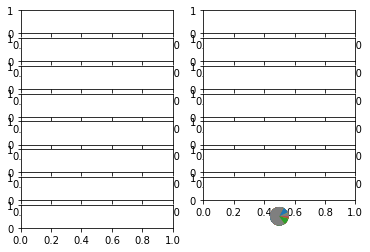

In [174]:
plt.subplots(8, 2)
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 1'])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 2"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 3"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 4"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 5"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 6"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 7"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 8"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 9"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 10"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 11"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 12"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 13"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 14"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 15"])
plt.pie(df3['Вагонов'][df3['Название компаний']=="Компания 16"])

plt.show()

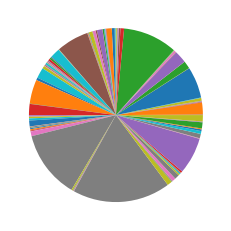

In [176]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 1'])
plt.show()

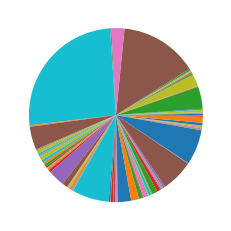

In [177]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 2'])
plt.show()

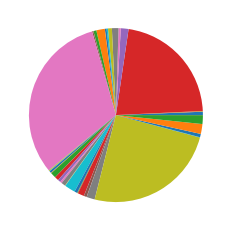

In [178]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 3'])
plt.show()

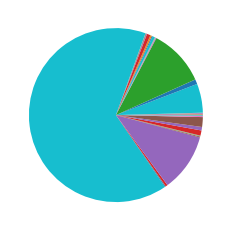

In [179]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 4'])
plt.show()

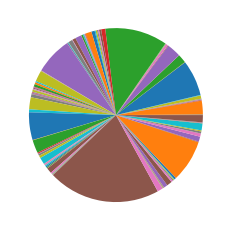

In [180]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 5'])
plt.show()

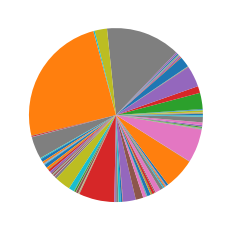

In [181]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 6'])
plt.show()

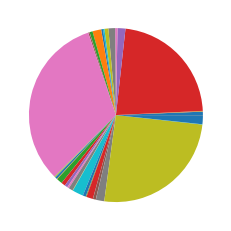

In [182]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 7'])
plt.show()

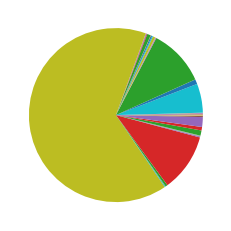

In [183]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 8'])
plt.show()

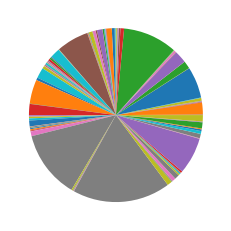

In [184]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 9'])
plt.show()

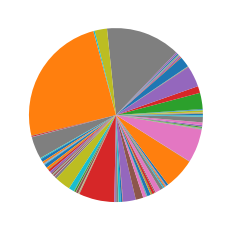

In [185]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 10'])
plt.show()

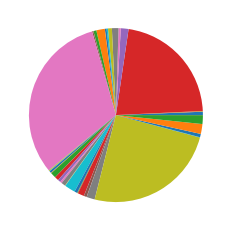

In [186]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 11'])
plt.show()

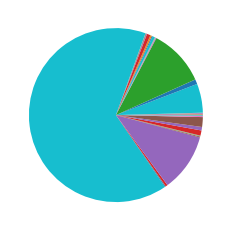

In [187]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 12'])
plt.show()

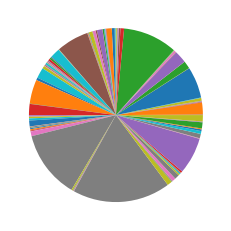

In [188]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 13'])
plt.show()

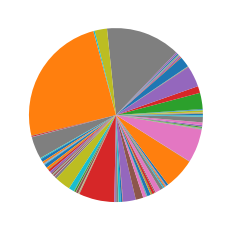

In [189]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 14'])
plt.show()

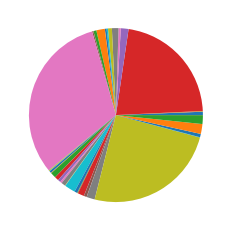

In [190]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 15'])
plt.show()

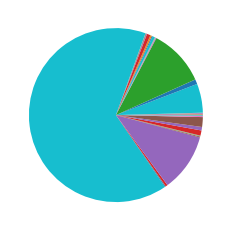

In [191]:
plt.pie(df3['Вагонов'][df3['Название компаний']=='Компания 16'])
plt.show()